In [ ]:
# K-최근접 이웃(K-Nearest Neighbor) 쉽게 이해하기

# K-최근접 이웃(K-Nearest Neighbor)은 머신러닝에서 사용되는 분류(Classification) 알고리즘이다. 유사한 특성을 가진 데이터는 유사한 범주에 속하는 경향이 있다는 가정하에 사용한다.

# K-최근접 이웃 알고리즘의 개념
# 원리를 쉽게 이해하기 위해 그림을 참고하겠다.

# 아래 그림을 보자. 모든 데이터(점)에는 각각 x값과 y값이 있다. 그리고 점의 색상으로 초록/빨강으로 표시하여 분류를 나타냈다. 그리고 하얀 점은 아직 분류가 안 된 새로운 데이터다. K-최근접 이웃(K-Nearest Neighbor) 알고리즘의 목적은 이렇게 새로운 점이 등장했을 때 이걸 초록이나 빨강으로 분류하는 거다.

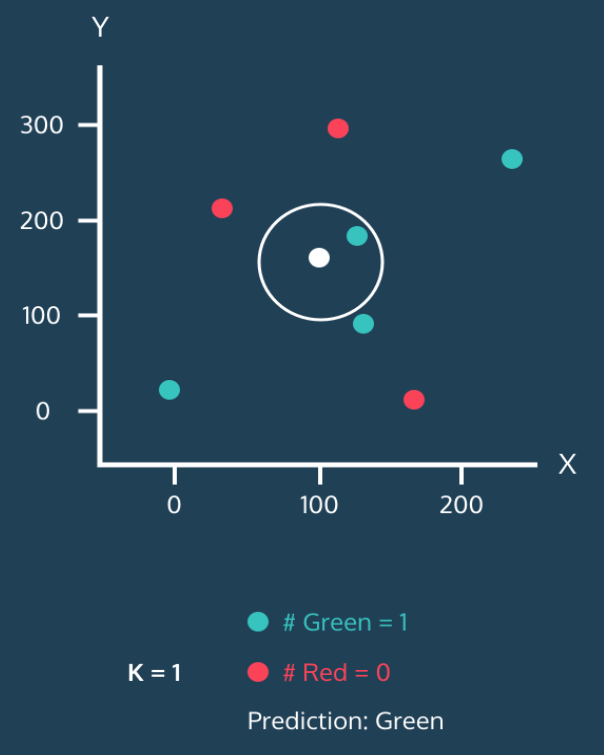

In [1]:
from IPython.display import Image
Image('E:\sources\T_KNN_image01.png')

In [ ]:
# """그런데 하얀 점 주의로 원을 그려놓았고, 이 원 안에는 1개의 이웃이 있다. 
# 이렇게 원 안에 포함될 이웃의 개수를 k라고 생각하면 된다. 
# 위 그림에서 k=1 이고, 하얀 점은 초록으로 분류되는 거다.

# 자, 이제 원을 확장해보자. k를 2로 조정해서
# 가장 가까운 이웃의 수를 2개까지 늘려보자."""

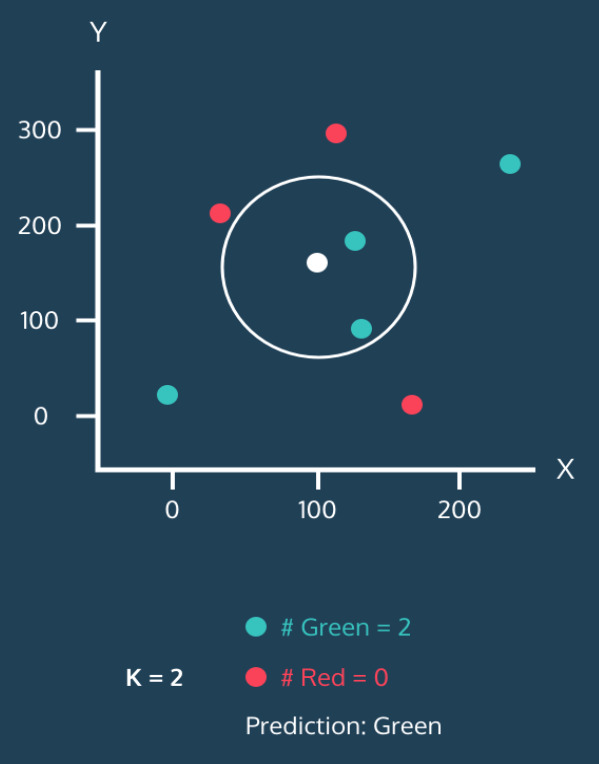

In [2]:
Image('E:\sources\T_KNN_image02.png')

In [ ]:
# """이웃 2개 모두 초록이다. 이번에도 하얀점은 초록으로 분류된다.

# 이번엔 가장 가까운 이웃의 숫자를 3으로 늘려보자."""

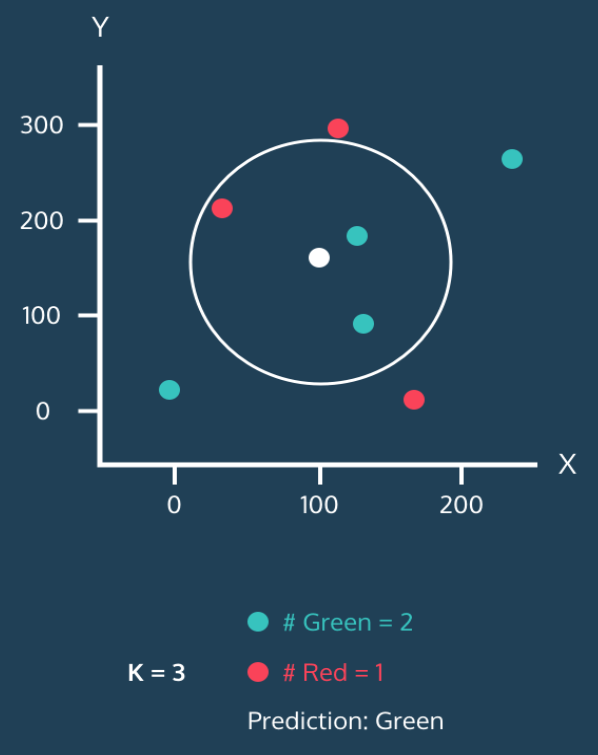

In [3]:
Image('E:\sources\T_KNN_image03.png')

In [ ]:
"""초록 2개, 빨강 1개다. 여전히 초록이 많기 때문에 
하얀 점은 초록으로 분류된다. 일종의 다수결이다.\
가장 가까운 이웃의 숫자를 4로 늘려보자."""

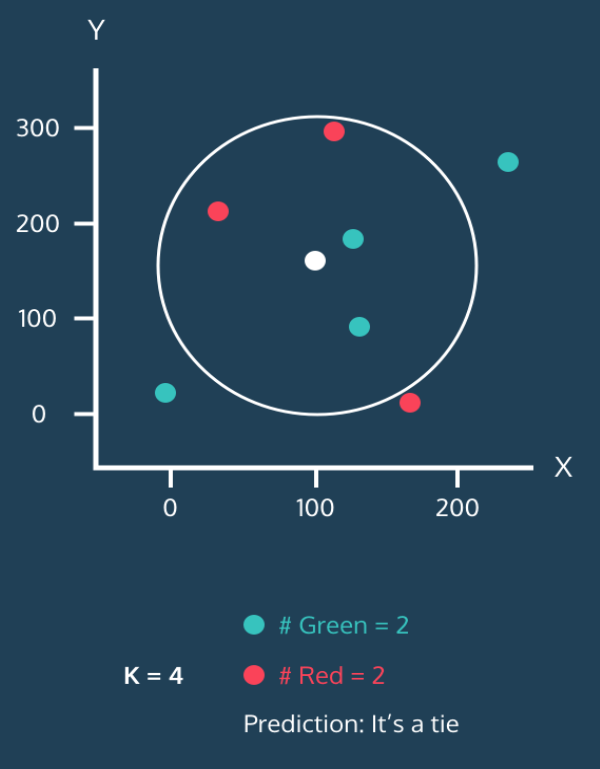

In [4]:
Image('E:\sources\T_KNN_image04.png')

In [ ]:
"""오… 초록 2개, 빨강 2개. 동률이 나왔다.

(이 때는 좀 곤란하다. 애초에 k를 홀수로 지정하면 이런 문제가 없는데 말이다.
물론 이렇게 동률(tie)이 나왔을 때 처리하는 몇가지 방법이 있긴 하다. 
예를 들면 가장 가까운 이웃을 따른다든가, 아니면 랜덤으로 찍는다든가. 
그러나 데이터가 충분하면 어쨌든 이러나 저러나 결과는 비슷하게 나오니 너무 걱정 말자.)"""

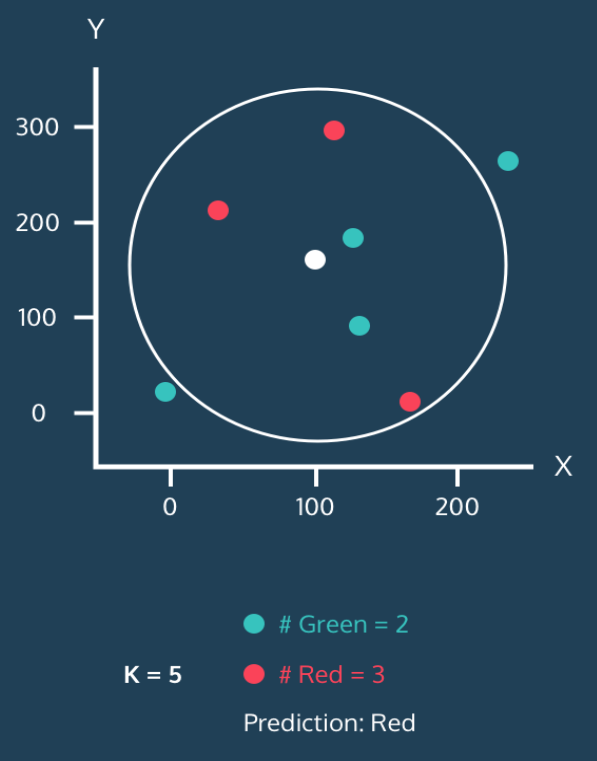

In [5]:
Image('E:\sources\T_KNN_image05.png')

In [ ]:
"""마지막으로 k를 5로 늘리면 원이 확장되면서 이웃 중 빨강이 3개, 
초록이 2개니까 하얀 점이 비로소 빨강으로 분류가 된다.

이게 K-Nearest Neighbor 알고리즘의 핵심 개념이다. 
이미 각 점들의 분류를 알고 있으면 새로운 점이 등장했을 때 
그 녀석을 어디로 분류할지 정할 수 있는 거다."""

In [ ]:
"""그런데 이 알고리즘에는 몇가지 생각해볼 문제들이 있다.

1. 정규화(Normalization)
위 예제에서는 x와 y값이 적당히 잘 퍼져 있으니 문제가 안 드러나지만 실제 데이터는 그렇지 않다. 예를 들어 성인 남녀의 연봉과 시력을 특성(feature)으로 생각해보자. 연봉 단위가 원(\)이면 편차가 천만 단위를 넘어가겠지만, 시력은 소숫점까지 따져가며 최대값과 최소값의 편차가 10 미만일 거다. (맞나…?) 아무튼 그걸 똑같은 기준으로 고려해서 반영하면 연봉이 압도적으로 반영되기 때문에 터무니 없는 결론이 나올 수 있다.

그래서 K-Nearest Neighbor 알고리즘을 사용할 때는 모든 특성들을 모두 고르게 반영하기 위해 정규화(Noramlizaion)을 해주곤 한다. 정규화하는 방법에는 여러가지가 있는데, 가장 널리 사용되는 방법은 두 가지다.

최소값을 0, 최대값을 1로 고정한 뒤 모든 값들을 0과 1사이 값으로 변환하는 방법
평균과 표준편차를 활용해서 평균으로부터 얼마나 떨어져 있는지 z-점수로 변환하는 방법
이 외에 다른 방법들도 있고, 각각의 장단점이 있지만 아무튼 보통 위 방법을 적절히 사용해서 특성들을 정규화 해주면 어느정도는 해결된다. 물론 정규화가 언제나 능사는 아닐 거다. 기회가 되면 다른 포스팅에서 더 자세히 다루겠다.

2. K 개수 선택
또 다시 고려할 중요한 문제는 “k를 몇으로 정할 것인가”이다. 이건 모든 값을 실제로 테스트하면서 분류 정확도(Accuracy)를 계산하는 과정에서 단서를 찾을 수 있다.

k가 너무 작을 때 : Overfitting
일단 k가 너무 작은 경우를 생각해보자. 극단적으로 k=1이라고 하자. 그러면 분류 정확도가 상당히 낮을 수밖에 없다. 시야가 좁아지는 거고, 아주 근처에 있는 점 하나에 민감하게 영향을 받기 때문이다. 이를 overfitting(과적합)이라고 한다. (overfitting은 머신러닝 알고리즘에서 정말정말 중요한 개념이니 꼭 알고 넘어가야 한다. 아래 글을 참고하자.)"""



In [ ]:
"""아무튼 K-Nearest Neighbors 알고리즘에서는 주변 다른 이웃들까지 충분히 고려하지 않았을 때 오버피팅이 발생한다. 그래서 하나의 이상치(outlier)가 있을 경우 근처에 있는 점의 레이블이 그 이상치에 의해 결정될 수 있다.

아래 그림을 보자."""

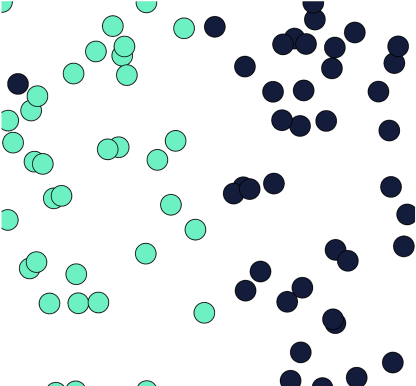

In [6]:
Image('E:\sources\T_KNN_image06.png')

In [ ]:
""" 그림 왼쪽 상단의 진한 파란색 점은 이상치인 것으로 보인다. 만약 k=1인 경우 그 근처에 데이터가 위치하면 녹색으로 분류되지 않고 이상치를 따라 진한 파란색으로 분류되어 버린다. """

In [ ]:
"""k가 너무 클 때 : Underfitting
반면에 k가 너무 큰 경우에는 underfitting(과소적합)이 발생한다. underfitting은 분류기가 학습 세트의 세세한 부분에 충분히 주의를 기울이지 않았기 때문에 나타난다. 예를 들어 학습 세트에 100개의 점이 있고 k=100으로 설정했다고 극단적으로 가정해보자. 그러면 모든 점이 결국 동일한 방식으로 분류될 거다. 점 사이의 거리는 의미가 없어진다. 물론 이건 극단적인 예이지만… 아무튼 k가 너무 그면 분류기가 학습 데이터를 충분히 세세하게 살펴보지 못한다는 뜻이다.

분류 모델을 생성할 때 일부 데이터는 검증에 활용되도록 떼어놓고 학습 데이터로만 모델을 생성해서 검증 데이터를 넣어 분류 정확도(Accuray) 확인할 수 있는데, (참고 글: 머신러닝에서 학습세트, 검증세트, 평가세트를 나누는 이유와 방법)

아래 그래프는 한 분류 모델에서 k 값을 변화시키면서 분류 정확도를 확인한 예시다."""

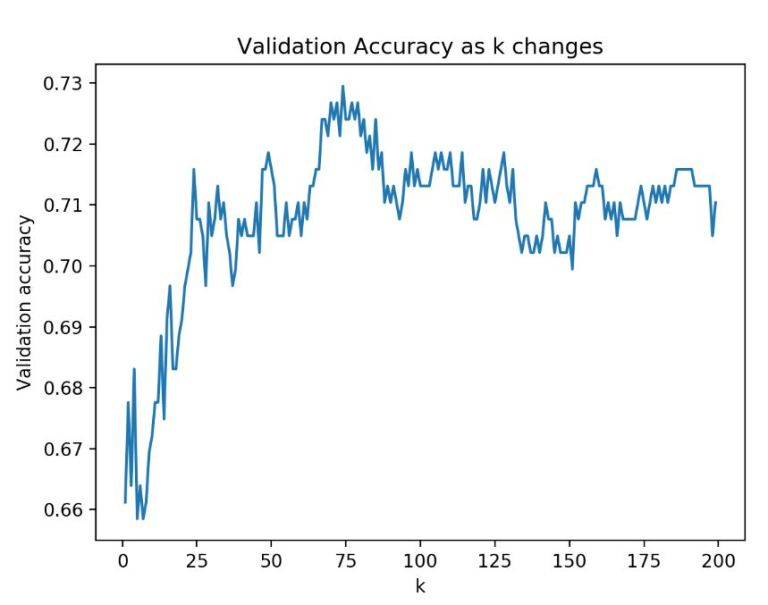

In [7]:
Image('E:\sources\T_KNN_image07.png')

In [9]:
"""너무 k가 작으면 과적합이 발생하여 정확도가 상대적으로 낮다. 반면 k가 너무 커져도 언더 피팅이 발생해서 정확도가 떨어지기 시작하는 걸 알 수 있다. 결국 75 언저리에서 가장 높은 정확도를 보여준다.

아무튼 이 정도까지 고려할 수 있다면 K-최근접 이웃(K-Nearest Neighbor) 알고리즘을 개념적으로 이해했다고 볼 수 있다. 구체적으로 점 사이의 거리를 구하는 방법도 중요한데, 그건 아래 포스팅을 참고하자."""

'너무 k가 작으면 과적합이 발생하여 정확도가 상대적으로 낮다. 반면 k가 너무 커져도 언더 피팅이 발생해서 정확도가 떨어지기 시작하는 걸 알 수 있다. 결국 75 언저리에서 가장 높은 정확도를 보여준다.\n\n아무튼 이 정도까지 고려할 수 있다면 K-최근접 이웃(K-Nearest Neighbor) 알고리즘을 개념적으로 이해했다고 볼 수 있다. 구체적으로 점 사이의 거리를 구하는 방법도 중요한데, 그건 아래 포스팅을 참고하자.'

In [ ]:
"""핵심 요약
아무튼 K-최근접 이웃(K-Nearest Neighbor) 알고리즘의 핵심 내용을 요약해보면 아래와 같이 정리할 수 있다.

n개의 특성(feature)을 가진 데이터는 n차원의 공간에 점으로 개념화 할 수 있다.
유사한 특성을 가진 데이터들끼리는 거리가 가깝다. 그리고 거리 공식을 사용하여 데이터 사이의 거리를 구할 수 있다.
분류를 알 수 없는 데이터에 대해 가장 가까운 이웃 k개의 분류를 확인하여 다수결을 할 수 있다.
분류기의 효과를 높이기 위해 파라미터를 조정할 수 있다.
K-Nearest Neighbors의 경우 k 값을 변경할 수 있다.
분류기가 부적절하게 학습되면 overfitting 또는 underfitting이 나타날 수 있다.
K-Nearest Neighbors의 경우 너무 작은 k는 overfitting, 너무 큰 k는 underfitting을 야기한다.
개념적으로 이해했다면 이제 파이썬을 통해 직접 분류 모델을 만들고 실험을 해보자."""

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#실제 데이터 돌려보기 전에 사용법부터 익히고 가자.

#일단 그 유명한 파이썬 머신러닝 라이브러리 싸이킷런을 불러오자

#이제 KNeighborsClassifier 모델을 생성해야 하는데, 이 때 n_neighbors로 k를 정해줘야 한다. (그리고 x 데이터를 분류를 할 때 k개의 이웃 중 거리가 가까운 이웃의 영향을 더 많이 받도록 가중치를 #설정하려면 weights = "distance"를 지정해줄 수 있는데 여기서는 일단 생략한다.)

In [11]:
classifier = KNeighborsClassifier(n_neighbors = 3)

In [12]:
# 그 다음 데이터를 .fit() 시켜준다. x 데이터는 여러 개의 차원으로 이루어진 
# 배열(점들의 집합)이 될 거고, y 데이터는 레이블(각 점들의 분류 결과)가 된다. 
# 이 예제에서는 0 아니면 1로 분류되는 거다.

In [13]:
training_points = [
  [0.5, 0.2, 0.1],
  [0.9, 0.7, 0.3],
  [0.4, 0.5, 0.7]
]
training_labels = [0, 1, 1]
classifier.fit(training_points, training_labels)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# 끝난 거다. 이제 만약 새로운 값들을 
# 분류하고 싶다면 .predict()를 사용하면 된다. 이렇게.

In [15]:
unknown_points = [
  [0.2, 0.1, 0.7],
  [0.4, 0.7, 0.6],
  [0.5, 0.8, 0.1]
]
guesses = classifier.predict(unknown_points)

In [16]:
# 실전 연습

In [18]:
# sklearn KNeighborsClassifier 실전 예제
# 데이터와 레이블 불러오기
# 일단 데이터가 마땅치 않으니 본 예제에서는 sklearn에서 제공하는 예시 데이터 중 유방암 데이터를 사용해보겠다. 일단 이렇게 불러오자.

In [19]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()

In [20]:
# 데이터 확인하기
# 그리고 이걸 평소에 익숙하게 다루는 pandas의 데이터 프레임의 형태로 바꿔서 확인해보자.

# .data를 찍어주면 데이터, .target을 찍어주면 레이블을 돌려준다.

In [21]:
import pandas as pd
df_data = pd.DataFrame(breast_cancer_data.data)
df_labels = pd.DataFrame(breast_cancer_data.target)

In [22]:
# 잘 불러왔는지 확인해보자.

# 일단 df_labels는 확인해보니 0과 1로만 표시되어 있었다.

In [23]:
df_labels.head()

,0
0,0
1,0
2,0
3,0
4,0


In [24]:
# 그리고 그 0과 1이 각각 어떤 걸 의미하는지는 이렇게 .target_names을 찍어보면 알 수 있다.

In [25]:
print(breast_cancer_data.target_names)

['malignant' 'benign']


In [26]:
# 사전 찾아보니 각각 악성(malignant), 양성(benign)이라는 뜻이라고 한다.

# 그런데 df.data에는 좀 문제가 있었다.

In [27]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
# 항목 이름(컬럼) 같은 것도 없고, 그냥 30개 항목에 대한 값만 쭉 들어 있다. 그런데 값이 어떤 건 엄청 큰 거 같고 어떤 건 1이 채 안되는 거 같다.

# 각 항목별로 최대/최소값을 비롯한 기초 통계량을 확인하기 위해 .describe()를 찍어보았다.

In [29]:
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [30]:
# 역시 뭔가 이상하다. 3번 컬럼은 최대 값이 2501이나 되는데, 9번 컬럼은 0.097이 최대값이다. 최소값도 항목에 따라 편차가 크다.

# 항목마다 스케일이 너무나 다른데 그걸 무시한 채 동일한 정도로 학습에 반영하면 안 될 거 같다. 정규화를 해줘야겠다.

In [31]:
# 본 예제에서는 최소-최대 정규화 함수를 작성한 후

In [32]:
def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

In [ ]:
# df_data에 적용해봤다.

In [33]:
for x in range(len(df_data.columns)):
    df_data[x] = min_max_normalize(df_data[x])
df_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# 모든 항목이 최소값은 0, 최대값은 1로 변환된 걸 확인할 수 있다.

In [35]:
# 데이터 세트 분리하기 (Training & Validation)
# 가지고 있는 데이터를 모두 사용해서 분류 모델을 만들 수도 있지만, 우리는 실제로 생성한 분류 모델의 성능을 테스트를 해봐야 하니까 학습(training) 세트와 검증(validation) 세트를 분리해보자. 모든 # 데이터에는 분류된 레이블(target)이 있으니, 검증 데이터를 예측 모델에 넣어서 실제 그 레이블(정답)을 잘 맞추는지 보기 위함이다.

# 데이터 세트 분리는 sklearn에서 train_test_split을 통해 손쉽게 할 수 있다.

# 데이터 세트를 나누는 비율을 지정할 수도 있는데 기본 값은 0.75:0.25, 즉 3:1이다. 3으로 학습해서 1로 시험보는 거다. 만약 비율을 바꾸고 싶다면 test_size의 값만 0에서 1사이로 넣어주면 된다. 
# test_size = 0.2 이렇게.
# random_state라는 파라미터도 있다. 데이터 세트를 나눌 때 난수를 바탕으로 무작위로 나누게 되는데, 이때 난수의 초기값을 고정시켜 주는 기능이다. random_state = 100 이라고 지정해놓았으니, 
# 나중에도 #이렇게 적어주면 이 실험 결과를 재현할 수 있다. (안 그러면 돌릴 때마다 매번 다르게 나눠줄 거다.)

In [60]:
from sklearn.model_selection import train_test_split
training_data, validation_data , training_labels, validation_labels = train_test_split(df_data, df_labels, test_size = 0.7, random_state = 300)

In [37]:
# 개수를 찍어보자.

In [61]:
print(len(training_data))
print(len(validation_data))
print(len(training_labels))
print(len(validation_labels))

170
399
170
399


In [39]:
# 455:144 대략 8:2로 분리된 걸 확인했다.

In [40]:
# 모델 생성하기
# 이제 모델을 생성하자. 당연히 학습 데이터를 가지고 모델을 생성한다. k=3으로 지정해보자.

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [42]:
# 생성한 모델에 데이터를 학습시키자. 위에서 나눠놓은 학습 데이터 세트(training_data, training_labels)로 학습시킨다.

In [63]:
classifier.fit(training_data, training_labels)

KNeighborsClassifier(n_neighbors=3)

In [44]:
# 모델의 정확도(Accuracy) 평가하기
# 위에서 데이터 세트를 나눠놨기 때문에 학습시킨 모델을 테스트 할 수 있다. 당연히 검증 세트의 데이터와 레이블을 넣어줘야 한다.

# KNeighborsClassifier에서는 .score()를 쓰면 모델의 정확도를 바로 확인할 수 있다.

In [64]:
print(classifier.score(validation_data, validation_labels))

0.9473684210526315


In [46]:
# 정확도가 96%, 꽤 나쁘지 않다.

# 그런데 이건 k=3일 때의 모델이다.

# 그렇다면 이번엔 k값을 1부터 100까지 바꿔가면서 모델 정확도를 구해서 저장해놓고, 시각화를 해보자.

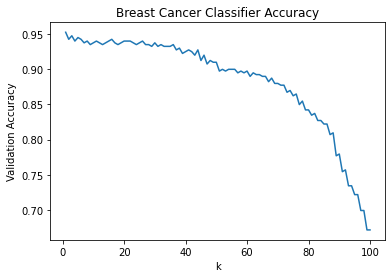

In [65]:
import matplotlib.pyplot as plt
k_list = range(1,101)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_labels))
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()